# Task

This data set is taken from an app that provides a free service. Within the app there is an option to enroll for a paid subscription that allows the user greater access to the app's features. Through analysis and data modeling we can see make predictions as to who will subscribe to the service based on their app behavior. 

In a business secenario the modelling of this data can provide value to those in charge of marketing and strategy. Once this data is modeled the outputs can be used to help the marketing team know who to sell to and who to not to sell to. This can help save time and money by customizing the subscription deals to each app user.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
%matplotlib inline

In [2]:
app = pd.read_csv('appdata10.csv')

In [3]:
app.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
app.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# need to clean the data now
# this changes the hours to integer format
app['hour'] = app.hour.str.slice(1,3).astype(int)

In [6]:
# we create a second dataset that includes only the information that interests us
app2 = app.copy().drop(columns = ['user', 'screen_list', 'enrolled_date', 'first_open','enrolled'])

In [7]:
#we're now left with only numeric values
app2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


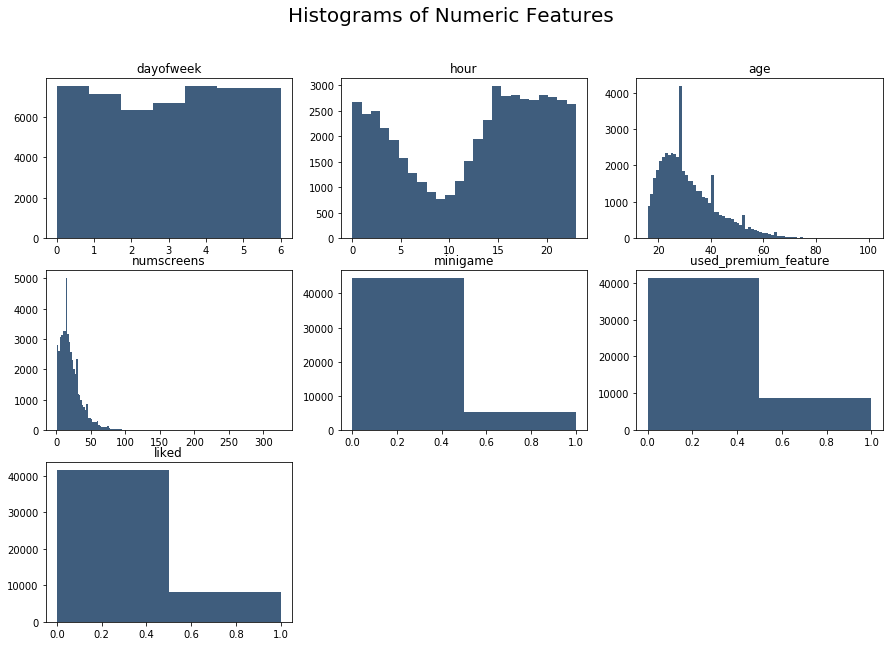

In [8]:
#create a subplot to get an overview of the numeric features in the set

plt.figure(figsize=(15,10))
plt.suptitle('Histograms of Numeric Features', fontsize = 20)
for i in range(1, app2.shape[1]+ 1):
    plt.subplot(3, 3, i)
    f = plt.gca()
    f.set_title(app2.columns.values[i-1])
    
    vals = np.size(app2.iloc[:, i-1].unique())
    
    plt.hist(app2.iloc[:, i-1], bins= vals, color= '#3F5D7D')

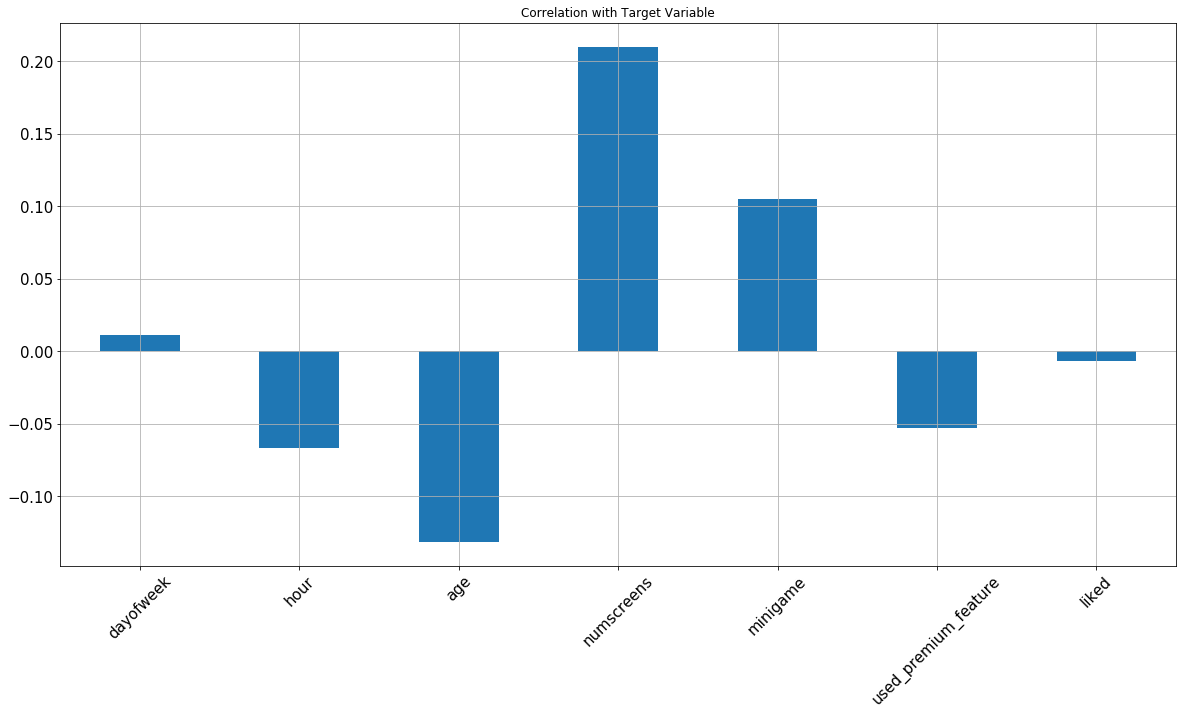

In [9]:
# finding correlations with various features and the target variable
app2.corrwith(app.enrolled).plot.bar(figsize = (20, 10), 
                                     title = "Correlation with Target Variable", 
                                     fontsize = 15, rot = 45, grid = True)

The above diagram helps us to understand the relationship between each variable in relation to whether the user enrolled in the paid version of the app. Some interesting findings can be seen with age of the users as well as whether they tried the premium features. 

We can see that the the younger users were willing to pay for the premium features. This would make sense if the younger generations simply trust the app more. This is simply speculation as its necessary to dig deeper into the entire data to understand the whole story. 

Interestingly, those that tried the premium features for free were less likely to pay for the premium version of the app. From a business standpoint this could be a red flag. If those that try the premium features are disatisfied with them, it would be imortant to do a follow-up study to see if the features are ineffective or lacking user friendliness. For now these are simply inuitions. Let's do some more exploration on the matter.

In [10]:
#building a correlation matrix to detect dependencies in the data
sns.set(style ='white', font_scale= 2)
corr = app2.corr()

In [11]:
#A mask simply makes the matrix cleaner to read. 
# rather than returning a mirrored matix (double the data) 
# we simply get the correlations only once this way

mask = np.zeros_like(corr, dtype =np.bool)
mask[np.triu_indices_from(mask)] = True

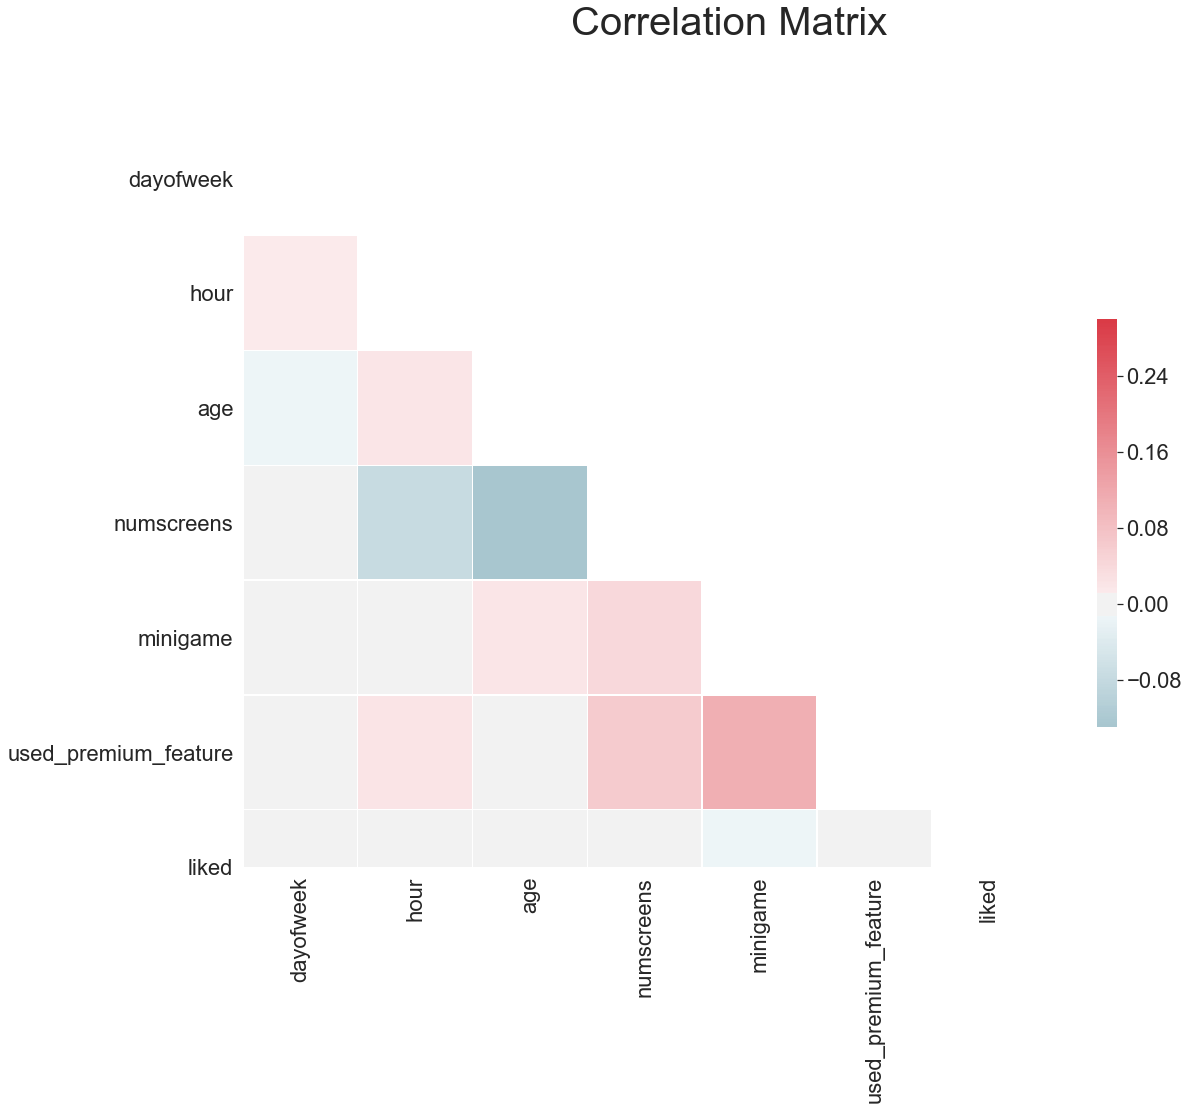

In [12]:
#setting up the figure
f, ax = plt.subplots(figsize= (18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

#generate a custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap= True)

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center =0,
            square= True, linewidths= .5, cbar_kws= {'shrink': .5})

The correlation matrix above helps us to make sure that the feature variables are independent. If these variables are not independant then this can interfere with the model and give deceiving predictions. Because none of the correlations are greater or less than around 0.08 we can conclude that all the feature variables are independent and we can proceed with building the model.

In [13]:
#change two of the features to datetime objects for easier manipulation

app['first_open'] = [parser.parse(row_data) for row_data in app["first_open"]]
app["enrolled_date"] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in app["enrolled_date"]]

In [14]:
app.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [15]:
#create a new column using the two new datetime columns 'first_open' and 'enrolled_date'

app["Time_difference"] = (app.enrolled_date - app.first_open).astype("timedelta64[h]")

Text(0, 0.5, 'Enrollments')

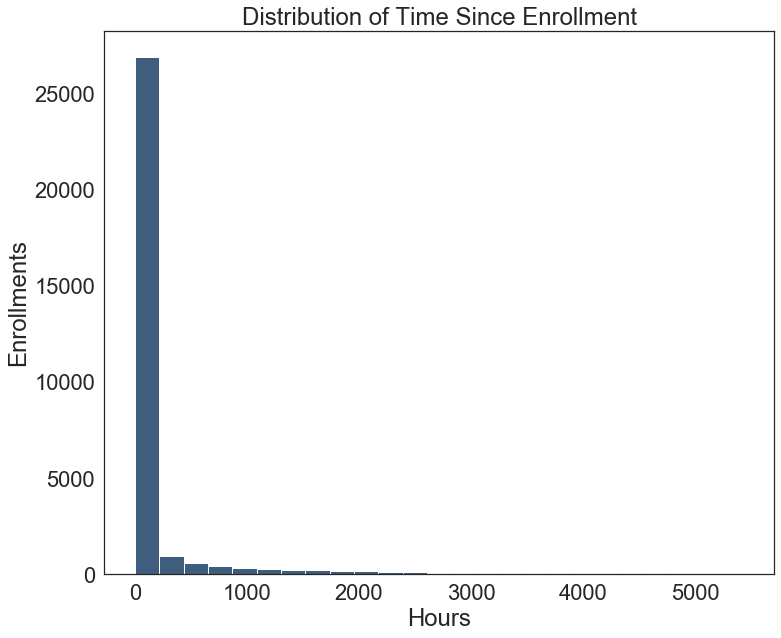

In [16]:
# a plot to visualize when the majority of subscriptions occur

plt.figure(figsize= (12, 10))
plt.hist(app['Time_difference'].dropna(), color = "#3F5D7D", bins= 25)
plt.title("Distribution of Time Since Enrollment")
plt.xlabel("Hours")
plt.ylabel("Enrollments")

When we see a visualization like this where the number range is greatly spread out, we need to consider granularity. It looks like the majority of subsciptions happened in the first 100 hours or activity. Let's look at the graph with a smaller range to get a better idea of what's happening.

Text(0, 0.5, 'Enrollments')

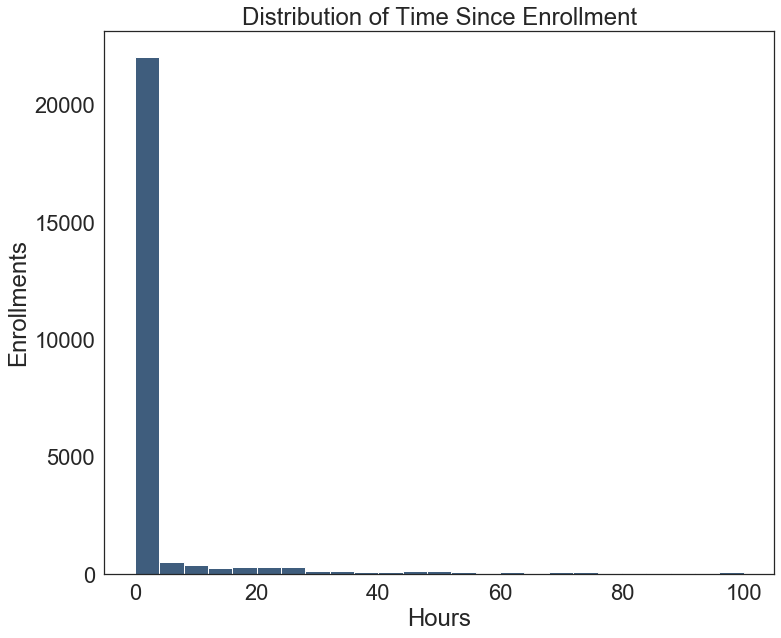

In [17]:
#Let's create the same graph but with a range of 1-100

plt.figure(figsize= (12, 10))
plt.hist(app['Time_difference'].dropna(), color = "#3F5D7D", range = [0, 100], bins=25)
plt.title("Distribution of Time Since Enrollment")
plt.xlabel("Hours")
plt.ylabel("Enrollments")

Upon closer inpection it looks like the majority of subscriptions actually occured in the first 5 hours of activity. After about 50 hours it appears that the enrollments drop off. In this case we will ignore any enrolled data after 48 hours. Putting the time frame into days makes it cleaner when presenting the data. Now that we have extracted the relevant information form the time data, we can delete the extraneous columns.

In [18]:
#crop the 'Time_differece' data and drop extra columns

app.loc[app.Time_difference > 48, 'enrolled'] = 0
app = app.drop(columns =['Time_difference', 'first_open', 'enrolled_date'])

In [19]:
app.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


In [20]:
#There are a lot of screens to keep track of so we will use data of the top screens to narrow our analysis
top_screens = pd.read_csv("top_screens.csv").top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [21]:
#add a comma to help count keep track of all the screens

app["screen_list"] = app.screen_list.astype(str) + ','

In [22]:
#create a column for each of the top screens in the 'top_screen' array


for sc in top_screens:
    # the first line in the loop will tell us if the screen list contains the top screens. 
    #This gives us a boolian value in the form of 1 or 0
    
    app[sc] = app.screen_list.str.contains(sc).astype(int)
    
    #edit the 'screen_list' column to return an empty string 
    app["screen_list"] = app.screen_list.str.replace(sc+",", "")

In [23]:
#create a column for the remaining screens

app['Other'] = app.screen_list.str.count(",")

In [24]:
app = app.drop(columns= ["screen_list"])

In [25]:
#create a list of the screens that act as funnels to the enrollment screen

saving_screens = ["Saving1",
                  "Saving2",
                  "Saving2Amount",
                  "Saving4",
                  "Saving5",
                  "Saving6",
                  "Saving7",
                  "Saving8",
                  "Saving9",
                  "Saving10"]

In [26]:
#create a column that counts the amount of each saving screen respectively
app["SavingsCount"] = app[saving_screens].sum(axis=1)

#drop the old 'saving_screens'
app = app.drop(columns= saving_screens)

In [27]:
#expand the column display to see other columns that can be collapsed together
pd.set_option('display.max_columns', 500)

In [28]:
app

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,location,Institutions,Credit3Container,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Credit3Dashboard,Loan3,CC1Category,Splash,Loan,CC1,RewardsContainer,Credit3,Credit1,EditProfile,Credit2,Finances,CC3,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount
0,235136,3,2,23,15,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7,0
1,333588,6,1,24,13,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0
2,254414,1,19,23,3,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0
4,51549,1,18,31,32,0,0,1,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6,0
49996,169179,1,0,35,4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
49997,302367,2,22,39,25,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0
49998,324905,6,12,27,26,0,0,1,0,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0


The various savings screens are highly correlated. In order to derive value from these screens we aggregate the values and colapse them into a single column that will fit into out model. We will now take three groups of features and collapse them into three features to avoid the same depencies in the data.

In [29]:
#collapse the credit monitoring screens

cm_screens = ['Credit1',
              'Credit2',
              'Credit3',
              'Credit3Container',
              'Credit3Dashboard']

app['CMCount'] = app[cm_screens].sum(axis=1)
app = app.drop(columns= cm_screens)

#collapse the credit card screens

cc_screens = ['CC1',
              'CC1Category',
              'CC3']
app['CCCount'] = app[cc_screens].sum(axis=1)
app = app.drop(columns= cc_screens)

#collapse the loan screens

loan_screens = ['Loan',
                'Loan2',
                'Loan3',
                'Loan4']

app['LoansCount'] = app[loan_screens].sum(axis=1)
app = app.drop(columns = loan_screens)

In [30]:
app

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,0,2,0,0
49996,169179,1,0,35,4,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
49997,302367,2,22,39,25,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0
49998,324905,6,12,27,26,0,0,1,0,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0


In [31]:
#save the data frame so it is ready for model building
app.to_csv("updated_appdata10.csv", index= False)

# Model Building

We will now build a model with the cleaned and preprocessed data. In this situation we are trying to determine who will subscribe to the paid version of the software given certain behavioural data. We will use a logistic regression model to classify those that would and would not subscribe. Understanding this can help the marketing team to target people who are less likely to subscribe. A data pipline can then be created and integrated into the app's software so that the machine learning model can evaluate each user and deploy targeted advertising to the unlikely subscribers.

In [32]:
dataset = pd.read_csv("updated_appdata10.csv")

In [33]:
#seperate the data feature and target variables
target = dataset["enrolled"]
dataset = dataset.drop(columns="enrolled")

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size=0.2, random_state=0)

In [36]:
train_identifier = X_train["user"]
X_train = X_train.drop(columns= "user")

In [37]:
test_identifier = X_test["user"]
X_test = X_test.drop(columns= "user")

In [38]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [39]:
#when the data sets are fit to the standard scaler the dataframes are changed into 2d arrays. 
#This syntax turns the arrays back into dataframes

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))

In [40]:
#when the data frames were changed into arrays, the column names were lost
#this is a fast and easy way to return the column names after we've transformed the 2d arrays back to a data frame
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

In [41]:
#copy over the indexes as well
X_train2.index = X_train.index.values
X_test2.index= X_test.index.values

In [42]:
#renaming the dataframes for simplification
X_train = X_train2
X_test = X_test2

In [43]:
#use a linear regression model
from sklearn.linear_model import LogisticRegression

In [44]:
#Use L1 regularization for this model

classifier = LogisticRegression(random_state=0, penalty= "l1")
classifier.fit(X_train, y_train)

C:\Users\rober\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

The penalty placed on this model with punish coefficients that are highly correlated to the target variable. This is done because some screens may come right before the enrolled screeen and thus necesarily must be correlated outside of the users behavioral control. We want to track user behavior as it pertains to their choices. If a certain step in an enrollment process is necessary this correlated juxtaposition is not true user behavior.

In [45]:
y_pred = classifier.predict(X_test)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [47]:
accuracy_score(y_test, y_pred)

0.7681

In [48]:
precision_score(y_test, y_pred)

0.7618952017667135

In [49]:
recall_score(y_test, y_pred)

0.7700892857142857

In [50]:
f1_score(y_test, y_pred)

0.7659703300030276

In [51]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3886 1186]
 [1133 3795]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      5072
           1       0.76      0.77      0.77      4928

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
accuracies = cross_val_score(estimator= classifier, X= X_train, y= y_train, cv=10)

C:\Users\rober\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rober\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rober\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rober\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rober\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

In [54]:
#this is a consistent accuracy across each fold. Also the model has a very low standard deviation which is good
print("Logistic Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

Logistic Accuracy: 0.767 (+/- 0.010)


In [55]:
final_results = pd.concat([y_test, test_identifier], axis = 1).dropna()
final_results["predicted_results"] = y_pred

In [56]:
#this final dataframe gives an easy to read chart to understand the output of the model in the context of the original data
final_results[['user', 'enrolled', 'predicted_results']].reset_index(drop= True).head(10)

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
5,65042,1,0
6,207226,1,1
7,363062,0,0
8,152296,1,1
9,64484,0,0


This logistic regression model was used to label news users as "Highly likely" or "Highly unlikely" to subscribe to a paid version of an app. We can also continue to add data to validate and update the model. This model helps us to understand the behaviour of the the "unlikely" subscribers so that we can narrow our marketing focus to them.

The increase in overall subscriptions will show the benefit of the model. We can offer better deals to people who are unlikely to subscribe to boost overall sales. This could come in the form of introductory deals as well as discounts on long subscription plans.

We could stop here or test other models and tweak hyper parameters to up the accuracy, precision, recall etc. An SVM or Random Forrest model could fare better depending on the business needs. If time is not a pressing issue I could create a function that feeds the data into multiple models and then return a visualization to compare them according to any metric I choose. I could also choose to go back and remove some of the features that may be bringing down the model. However, the purpose of this project is more to illustrate how data science can fill an need in business, rather than how well we can optimize a model.